In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
import gsw
from xhistogram.xarray import histogram

#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Straight Coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/600yr/24000101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/600yr/24000101.ocean_annual_rho2.nc'
drho_straight = xr.open_dataset(path_rho2_straight, decode_times=True)

# path to ocean_annual_z file
path_z_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/600yr/24000101.ocean_annual_z.nc'
dz_straight = xr.open_dataset(path_z_straight, decode_times=True)



# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/600yr/24000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/600yr/24000101.ocean_annual_rho2.nc'
drho_both = xr.open_dataset(path_rho2_both, decode_times=True)

# path to ocean_annual_z file
path_z_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/600yr/24000101.ocean_annual_z.nc'
dz_both = xr.open_dataset(path_z_both, decode_times=True)



# Case name (Wide Straight)
case_wide = 'Wide Straight'

# path to ocean_annual file
path_year_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/600yr/24000101.ocean_annual.nc'
dy_wide = xr.open_dataset(path_year_wide, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/600yr/24000101.ocean_annual_rho2.nc'
drho_wide = xr.open_dataset(path_rho2_wide, decode_times=True)

# path to ocean_annual_z file
path_z_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/600yr/24000101.ocean_annual_z.nc'
dz_wide = xr.open_dataset(path_z_wide, decode_times=True)



# Case name (America Coast)
case_am = 'America Coast'

# path to ocean_annual file
path_year_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/600yr/24000101.ocean_annual.nc'
dy_am = xr.open_dataset(path_year_am, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/600yr/24000101.ocean_annual_rho2.nc'
drho_am = xr.open_dataset(path_rho2_am, decode_times=True)

# path to ocean_annual_z file
path_z_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/600yr/24000101.ocean_annual_z.nc'
dz_am = xr.open_dataset(path_z_am, decode_times=True)


# Case name (Africa Coast)
case_af = 'Africa Coast'

# path to ocean_annual file
path_year_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/500yr/23000101.ocean_annual.nc'
dy_af = xr.open_dataset(path_year_af, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/500yr/23000101.ocean_annual_rho2.nc'
drho_af = xr.open_dataset(path_rho2_af, decode_times=True)

# path to ocean_annual_z file
path_z_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/500yr/23000101.ocean_annual_z.nc'
dz_af = xr.open_dataset(path_z_af, decode_times=True)

#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy_straight['xh']==211)[0][0]
x_east = np.where(dy_straight['xh']==351)[0][0]
y = np.where(dy_straight['yq']==-35)[0][0]
y_south = np.where(dy_straight['yq']==-71)[0][0]
y_north = np.where(dy_straight['yq']==71)[0][0]

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [31]:
def calc_sigma2(dy_case, salt, temp):
    CT = xr.apply_ufunc(gsw.CT_from_pt, salt, temp, dask='parallelized', output_dtypes=[float,])

    sigma2 = xr.apply_ufunc(gsw.sigma2, salt, CT, dask='parallelized', output_dtypes=[float,])
    
    sigma2_xarray = temp.copy()
    sigma2_xarray.attrs['units'] = 'kg/m^3' 
    sigma2_xarray.attrs['long_name'] = 'potential density referenced to 2000 dbar'
    sigma2_xarray.attrs['standard_name'] = 'sigma2'
    sigma2_xarray.values = sigma2
    
    return sigma2_xarray


def calculate_global_sfn(vmo, vhGM):
    vmo_slice = vmo.isel(time=slice(-31,-1)).mean(dim='time')
    vhGM_slice = vhGM.isel(time=slice(-31,-1)).mean(dim='time')
    sfn_global_resmean = (np.cumsum(np.nansum(vmo_slice/1035, axis=2), axis=0))/(1e6)
    sfn_global_res = (np.cumsum(np.nansum(vhGM_slice/1035, axis=2), axis=0))/(1e6)
    sfn_global_mean = sfn_global_resmean - sfn_global_res
    return sfn_global_mean, sfn_global_res, sfn_global_resmean


def calculate_basin_sfn(vmo, vhGM, x_west, x_east, y_south, y_north):
    vmo_slice = vmo.isel(time=slice(-31,-1)).mean(dim='time')
    vhGM_slice = vhGM.isel(time=slice(-31,-1)).mean(dim='time')
    sfn_basin_resmean = (np.cumsum(np.nansum((vmo_slice[:,y_south:y_north,x_west:x_east])/1035, axis=2), axis=0))/(1e6)
    sfn_basin_res = (np.cumsum(np.nansum((vhGM_slice[:,y_south:y_north,x_west:x_east])/1035, axis=2), axis=0))/(1e6)
    sfn_basin_mean = sfn_basin_resmean - sfn_basin_res
    return sfn_basin_mean, sfn_basin_res, sfn_basin_resmean


def variablename(*arg):
    names = []
    for i in range(len(arg)):
        item = [tpl[0] for tpl in filter(lambda x: arg[i] is x[1], globals().items())]
        names.append(item)
    str(names).strip('[]')
    return names

def plot_global_sfn(sfn_mean, sfn_res, sfn_resmean, sfn_bound, dataset, case):
    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 21, endpoint=True)
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
    sfn_list = sfn_mean, sfn_res, sfn_resmean
    names = variablename(sfn_mean, sfn_res, sfn_resmean)
    sname = str(names[2]).strip("['']")
    for row in range(3):
        ax = axs[row]
        cf = ax.contourf(dataset.yq, dataset.rho2_l-1000, sfn_list[row], b, cmap='RdBu_r', extend='both')
        ax.set_ylim(25, 37.7)
        ax.invert_yaxis()
        ax.set_xlim(-70, 70)
        plt.ylabel('Density', fontsize=14), plt.xlabel('Latitude', fontsize=14)
        ax.set_title('{}'.format(str(names[row]).strip("['']"))+' '+'{}'.format(case), fontsize=16)
        cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
        cbar.ax.set_ylabel('[Sv]', fontsize=12)
    axs[2].set_ylabel('$\sigma_2$ [kg m$^{-3}$]', fontsize=14), axs[2].set_xlabel('Latitude', fontsize=14)
#     plt.savefig(fig_path+'{}_global.png'.format(sname))
    plt.show()
    return


def plot_basin_sfn(sfn_mean, sfn_res, sfn_resmean, sfn_bound, dataset, y_south, y_north, case):
    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 21, endpoint=True)
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
    sfn_list = sfn_mean, sfn_res, sfn_resmean
    names = variablename(sfn_mean, sfn_res, sfn_resmean)
    sname = str(names[2]).strip("['']")
    for row in range(3):
        ax = axs[row]
        cf = ax.contourf(dataset.yq[y_south:y_north], dataset.rho2_l-1000, sfn_list[row][:,:], 
                         b, cmap='RdBu_r', extend='both')
        ax.set_ylim(25, 37.7)
        ax.invert_yaxis()
        ax.set_xlim(dataset.yq[y_south], dataset.yq[y_north-1])
        ax.set_title('{}'.format(str(names[row]).strip("['']"))+' '+'{}'.format(case), fontsize=16)
        cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
        cbar.ax.set_ylabel('[Sv]', fontsize=12)
    axs[2].set_ylabel('$\sigma_2$ [kg m$^{-3}$]', fontsize=14), axs[2].set_xlabel('Latitude', fontsize=14)
#     plt.savefig(fig_path+'{}.png'.format(sname))
    plt.show()
    return


def plot_global_sfn_density(sfn_resmean, sfn_bound, dataset, case):
    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 21, endpoint=True)
    fig, ax = plt.subplots(figsize=(8,4))
    cf = ax.contourf(dataset.yq, dataset.z_l, sfn_resmean, b, cmap='RdBu_r', extend='both')
    c = ax.contour(dataset.sigma2.yh, dataset.sigma2.zl, dataset.sigma2.mean(dim='xh'), levels=10, colors='black')
    ax.clabel(c, inline=True, inline_spacing=2, fmt='%.0f', fontsize=10, rightside_up=True)
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case)+' Residual Mean Overturning', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
#     plt.savefig(fig_path+'sfn_density_global.png')
    plt.show()
    return


def plot_basin_sfn_density(sfn_resmean, sfn_bound, dataset, basin, x_west, x_east, y_south, y_north, case):
    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 21, endpoint=True)
    fig, ax = plt.subplots(figsize=(8,4))
    cf = ax.contourf(dataset.yq.isel(yq=slice(y_south,y_north)), dataset.z_l, sfn_resmean, 
                     b, cmap='RdBu_r', extend='both')
    c = ax.contour(dataset.sigma2.yh.isel(yh=slice(y_south-1,y_north+1)), dataset.sigma2.zl, 
                   dataset.sigma2.isel(xh=slice(x_west, x_east)).isel(yh=slice(y_south-1,y_north+1)).mean(dim='xh'), 
                   levels=10, colors='black')
    ax.clabel(c, inline=True, inline_spacing=2, fmt='%.0f', fontsize=10, rightside_up=True)
    ax.invert_yaxis()
    ax.set_xlim(dataset.yq[y_south], dataset.yq[y_north-1])
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
    ax.set_title('{}'.format(case)+' '+'{}'.format(basin)+' Residual Mean Overturning', fontsize=16)
    ax.set_ylabel('Depth [m]', fontsize=14), ax.set_xlabel('Latitude', fontsize=14)
#     plt.savefig(fig_path+'{}.png'.format(sname))
    plt.show()
    return

def plot_global_sfn_z(sfn_resmean, sfn_bound, dataset, case):
    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 21, endpoint=True)
    fig, ax = plt.subplots(figsize=(8,4))
    cf = ax.contourf(dataset.yq, dataset.z_l, sfn_resmean, b, cmap='RdBu_r', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case)+' Residual Mean Overturning', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
#     plt.savefig(fig_path+'sfn_density_global_z.png')
    plt.show()
    return


def plot_basin_sfn_z(sfn_resmean, sfn_bound, dataset, basin, x_west, x_east, y_south, y_north, case):
    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 21, endpoint=True)
    fig, ax = plt.subplots(figsize=(8,4))
    cf = ax.contourf(dataset.yq.isel(yq=slice(y_south,y_north)), dataset.z_l, sfn_resmean, 
                     b, cmap='RdBu_r', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(dataset.yq[y_south], dataset.yq[y_north-1])
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
    ax.set_title('{}'.format(case)+' '+'{}'.format(basin)+' Residual Mean Overturning', fontsize=16)
    ax.set_ylabel('Depth [m]', fontsize=14), ax.set_xlabel('Latitude', fontsize=14)
#     plt.savefig(fig_path+'{}_basin_sfn_z.png'.format(basin))
    plt.show()
    return


def plot_sfn_mapped2depth(sfn_small_resmean, 
                          sfn_large_resmean, 
                          sfn_so_resmean, 
                          sfn_bound, 
                          dataset, 
                          lat_north, 
                          lat_south,
                          case):
    
    h_small = dataset.h.isel(xh=slice(x_west,x_east)).isel(yh=slice(y,y_north)).mean(dim='time').mean(dim='xh')
    h_large = dataset.h.isel(xh=slice(0,x_west)).isel(yh=slice(y,y_north)).mean(dim='time').mean(dim='xh')
    h_so = dataset.h.isel(yh=slice(y_south,y)).mean(dim='time').mean(dim='xh')
    
    depth_small = h_small.cumsum(dim='rho2_l')
    depth_large = h_large.cumsum(dim='rho2_l')
    depth_so = h_so.cumsum(dim='rho2_l')

    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 21, endpoint=True)
    
    fig, ax = plt.subplots(figsize=(8,4))
    cf = ax.contourf(lat_north, depth_small, 
                 sfn_small_resmean, b, cmap='RdBu_r', extend='both')
    ax.invert_yaxis()
    ax.set_title('{}'.format(case)+' Small Basin Overturning Streamfunction', fontsize=16)
    cbar = fig.colorbar(cf, ticks=t, ax=ax, format = '%.0f')
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
    # ax.set_ylabel('Depth [m]', fontsize=14), ax.set_xlabel('Latitude', fontsize=14)
    plt.show()
    
#     t = np.linspace(-sfn_bound+20, sfn_bound-20, 11, endpoint=True)
#     b = np.linspace(-sfn_bound+20, sfn_bound-20, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(8,4))
    cf = ax.contourf(lat_north, depth_large, 
                 sfn_large_resmean, b, cmap='RdBu_r', extend='both')
    ax.invert_yaxis()
    ax.set_title('{}'.format(case)+' Large Basin Overturning Streamfunction', fontsize=16)
    cbar = fig.colorbar(cf, ticks=t, ax=ax, format = '%.0f')
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
    ax.set_ylabel('Depth [m]', fontsize=14) #, ax.set_xlabel('Latitude', fontsize=14)
    plt.show()

    fig, ax = plt.subplots(figsize=(8,4))
    cf = ax.contourf(lat_south, depth_so, 
                 sfn_so_resmean, b, cmap='RdBu_r', extend='both')
    ax.invert_yaxis()
    ax.set_title('{}'.format(case)+' Southern Ocean Overturning Streamfunction', fontsize=16)
    cbar = fig.colorbar(cf, ticks=t, ax=ax, format = '%.0f')
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
    ax.set_xlabel('Latitude', fontsize=14)
    plt.show()
    
    return


def plot_sfnmapped2depth_mesh(sfn_small_resmean, 
                              sfn_large_resmean, 
                              sfn_so_resmean, 
                              sfn_bound, 
                              dataset, 
                              lat_north, 
                              lat_south,
                              case):
    
    h_small = dataset.h.isel(xh=slice(x_west,x_east)).isel(yh=slice(y,y_north)).mean(dim='time').mean(dim='xh')
    h_large = dataset.h.isel(xh=slice(0,x_west)).isel(yh=slice(y,y_north)).mean(dim='time').mean(dim='xh')
    h_so = dataset.h.isel(yh=slice(y_south,y)).mean(dim='time').mean(dim='xh')
    
    depth_small = h_small.cumsum(dim='rho2_l')
    depth_large = h_large.cumsum(dim='rho2_l')
    depth_so = h_so.cumsum(dim='rho2_l')

    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 21, endpoint=True)
    
    fig, ax = plt.subplots(figsize=(8,4))
    cf = ax.pcolormesh(lat_north, depth_small, 
                 sfn_small_resmean, vmin=-sfn_bound, vmax=sfn_bound, cmap='RdBu_r')
    c = ax.contour(lat_north, depth_small, 
                   sfn_small_resmean, levels=7, colors='black')
    ax.invert_yaxis()
    ax.set_title('{}'.format(case)+' Small Basin Overturning Streamfunction', fontsize=16)
    cbar = fig.colorbar(cf, ticks=t, ax=ax, format = '%.0f')
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
    # ax.set_ylabel('Depth [m]', fontsize=14), ax.set_xlabel('Latitude', fontsize=14)
    plt.show()
    
#     t = np.linspace(-sfn_bound+20, sfn_bound-20, 11, endpoint=True)
#     b = np.linspace(-sfn_bound+20, sfn_bound-20, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(8,4))
    cf = ax.pcolormesh(lat_north, depth_large, 
                 sfn_large_resmean, vmin=-sfn_bound, vmax=sfn_bound, cmap='RdBu_r')
    c = ax.contour(lat_north, depth_large, 
                   sfn_large_resmean, levels=7, colors='black')
    ax.invert_yaxis()
    ax.set_title('{}'.format(case)+' Large Basin Overturning Streamfunction', fontsize=16)
    cbar = fig.colorbar(cf, ticks=t, ax=ax, format = '%.0f')
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
    ax.set_ylabel('Depth [m]', fontsize=14) #, ax.set_xlabel('Latitude', fontsize=14)
    plt.show()

    fig, ax = plt.subplots(figsize=(8,4))
    cf = ax.pcolormesh(lat_south, depth_so, 
                 sfn_so_resmean, vmin=-sfn_bound, vmax=sfn_bound, cmap='RdBu_r')
    c = ax.contour(lat_south, depth_so, 
                   sfn_so_resmean, levels=7, colors='black')
    ax.invert_yaxis()
    ax.set_title('{}'.format(case)+' Southern Ocean Overturning Streamfunction', fontsize=16)
    cbar = fig.colorbar(cf, ticks=t, ax=ax, format = '%.0f')
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
    ax.set_xlabel('Latitude', fontsize=14)
    plt.show()
    
    return

In [33]:
# Straight Coast
# Calculate global mean, residual, and residual mean overturning streamfunction
sfn_mean_straight, sfn_res_straight, sfn_resmean_straight = calculate_global_sfn(drho_straight.vmo, 
                                                                                 drho_straight.vhGM)

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines compute streamfunctions for separate basins.
sfn_small_mean_straight, sfn_small_res_straight, sfn_small_resmean_straight = calculate_basin_sfn(drho_straight.vmo, 
                                                                                                  drho_straight.vhGM,
                                                                                                  x_west, 
                                                                                                  x_east, 
                                                                                                  y, 
                                                                                                  y_north)
sfn_large_mean_straight, sfn_large_res_straight, sfn_large_resmean_straight = calculate_basin_sfn(drho_straight.vmo, 
                                                                                                  drho_straight.vhGM,
                                                                                                  0, 
                                                                                                  x_west, 
                                                                                                  y, 
                                                                                                  y_north)
sfn_so_mean_straight, sfn_so_res_straight, sfn_so_resmean_straight = calculate_basin_sfn(drho_straight.vmo, 
                                                                                         drho_straight.vhGM, 
                                                                                         0, 
                                                                                         360, 
                                                                                         y_south, 
                                                                                         y)


In [34]:
# Both Coast
# Calculate global mean, residual, and residual mean overturning streamfunction
sfn_mean_both, sfn_res_both, sfn_resmean_both = calculate_global_sfn(drho_both.vmo, 
                                                                     drho_both.vhGM)

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines compute streamfunctions for separate basins.
sfn_small_mean_both, sfn_small_res_both, sfn_small_resmean_both = calculate_basin_sfn(drho_both.vmo, 
                                                                                                  drho_both.vhGM,
                                                                                                  x_west, 
                                                                                                  x_east, 
                                                                                                  y, 
                                                                                                  y_north)
sfn_large_mean_both, sfn_large_res_both, sfn_large_resmean_both = calculate_basin_sfn(drho_both.vmo, 
                                                                                                  drho_both.vhGM,
                                                                                                  0, 
                                                                                                  x_west, 
                                                                                                  y, 
                                                                                                  y_north)
sfn_so_mean_both, sfn_so_res_both, sfn_so_resmean_both = calculate_basin_sfn(drho_both.vmo, 
                                                                                         drho_both.vhGM, 
                                                                                         0, 
                                                                                         360, 
                                                                                         y_south, 
                                                                                         y)

In [35]:
# Wide Coast
# Calculate global mean, residual, and residual mean overturning streamfunction
sfn_mean_wide, sfn_res_wide, sfn_resmean_wide = calculate_global_sfn(drho_wide.vmo, 
                                                                     drho_wide.vhGM)

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines compute streamfunctions for separate basins.
sfn_small_mean_wide, sfn_small_res_wide, sfn_small_resmean_wide = calculate_basin_sfn(drho_wide.vmo, 
                                                                                                  drho_wide.vhGM,
                                                                                                  x_west, 
                                                                                                  x_east, 
                                                                                                  y, 
                                                                                                  y_north)
sfn_large_mean_wide, sfn_large_res_wide, sfn_large_resmean_wide = calculate_basin_sfn(drho_wide.vmo, 
                                                                                                  drho_wide.vhGM,
                                                                                                  0, 
                                                                                                  x_west, 
                                                                                                  y, 
                                                                                                  y_north)
sfn_so_mean_wide, sfn_so_res_wide, sfn_so_resmean_wide = calculate_basin_sfn(drho_wide.vmo, 
                                                                                         drho_wide.vhGM, 
                                                                                         0, 
                                                                                         360, 
                                                                                         y_south, 
                                                                                         y)

In [36]:
# America Coast
# Calculate global mean, residual, and residual mean overturning streamfunction
sfn_mean_am, sfn_res_am, sfn_resmean_am = calculate_global_sfn(drho_am.vmo, 
                                                                                 drho_am.vhGM)

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines compute streamfunctions for separate basins.
sfn_small_mean_am, sfn_small_res_am, sfn_small_resmean_am = calculate_basin_sfn(drho_am.vmo, 
                                                                                                  drho_am.vhGM,
                                                                                                  x_west, 
                                                                                                  x_east, 
                                                                                                  y, 
                                                                                                  y_north)
sfn_large_mean_am, sfn_large_res_am, sfn_large_resmean_am = calculate_basin_sfn(drho_am.vmo, 
                                                                                                  drho_am.vhGM,
                                                                                                  0, 
                                                                                                  x_west, 
                                                                                                  y, 
                                                                                                  y_north)
sfn_so_mean_am, sfn_so_res_am, sfn_so_resmean_am = calculate_basin_sfn(drho_am.vmo, 
                                                                                         drho_am.vhGM, 
                                                                                         0, 
                                                                                         360, 
                                                                                         y_south, 
                                                                                         y)

In [37]:
# Africa Coast
# Calculate global mean, residual, and residual mean overturning streamfunction
sfn_mean_af, sfn_res_af, sfn_resmean_af = calculate_global_sfn(drho_af.vmo, 
                                                                                 drho_af.vhGM)

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines compute streamfunctions for separate basins.
sfn_small_mean_af, sfn_small_res_af, sfn_small_resmean_af = calculate_basin_sfn(drho_af.vmo, 
                                                                                                  drho_af.vhGM,
                                                                                                  x_west, 
                                                                                                  x_east, 
                                                                                                  y, 
                                                                                                  y_north)
sfn_large_mean_af, sfn_large_res_af, sfn_large_resmean_af = calculate_basin_sfn(drho_af.vmo, 
                                                                                                  drho_af.vhGM,
                                                                                                  0, 
                                                                                                  x_west, 
                                                                                                  y, 
                                                                                                  y_north)
sfn_so_mean_af, sfn_so_res_af, sfn_so_resmean_af = calculate_basin_sfn(drho_af.vmo, 
                                                                                         drho_af.vhGM, 
                                                                                         0, 
                                                                                         360, 
                                                                                         y_south, 
                                                                                         y)

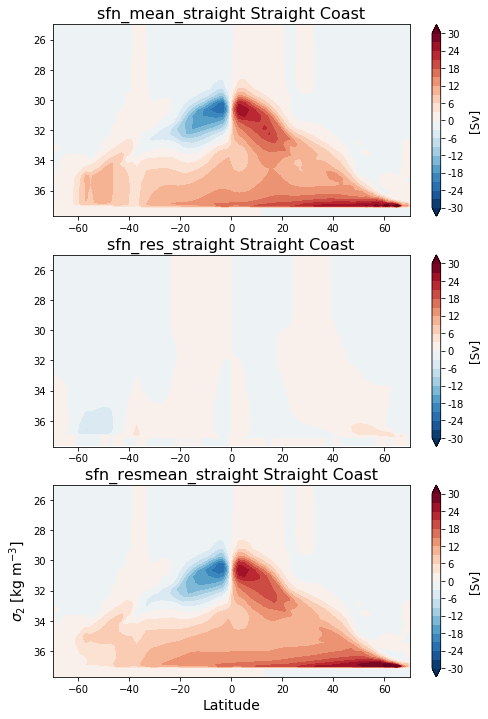

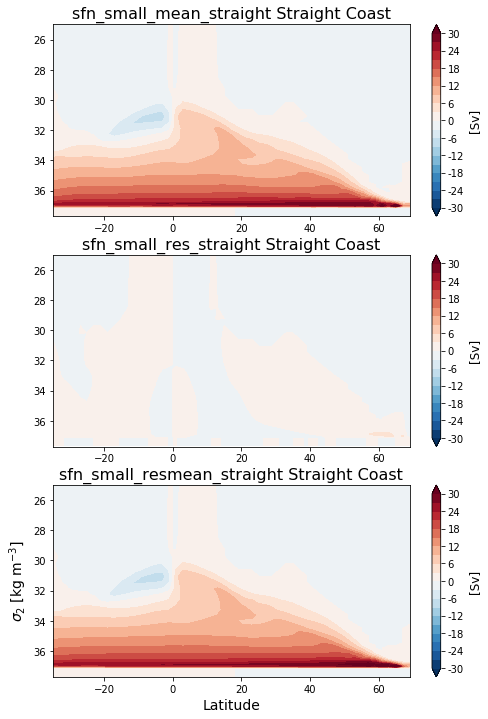

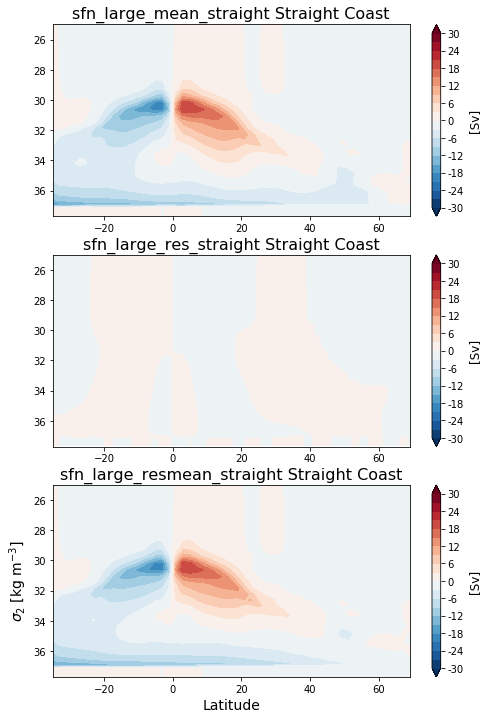

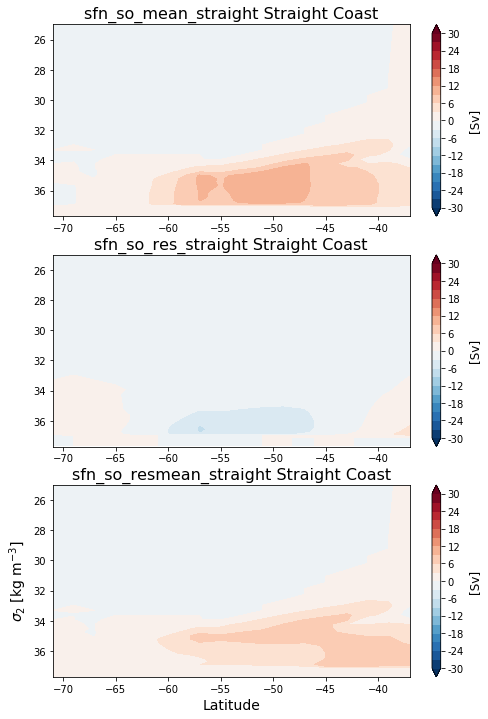

In [8]:
# Straight Coast
# Plot global mean, residual, and residual mean overturning streamfunction
plot_global_sfn(sfn_mean_straight, sfn_res_straight, sfn_resmean_straight, 30, drho_straight, 'Straight Coast')

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines plot streamfunctions for separate basins.
plot_basin_sfn(sfn_small_mean_straight, sfn_small_res_straight, sfn_small_resmean_straight, 
               30, drho_straight, y, y_north, 'Straight Coast')
plot_basin_sfn(sfn_large_mean_straight, sfn_large_res_straight, sfn_large_resmean_straight, 
               30, drho_straight, y, y_north, 'Straight Coast')
plot_basin_sfn(sfn_so_mean_straight, sfn_so_res_straight, sfn_so_resmean_straight, 
               30, drho_straight, y_south, y, 'Straight Coast')


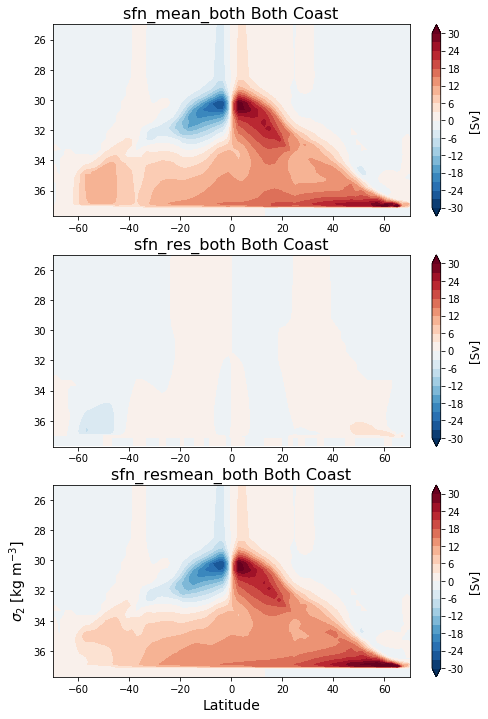

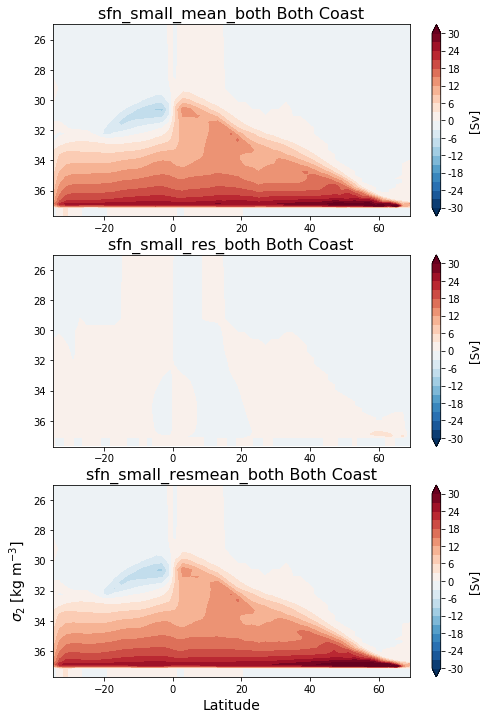

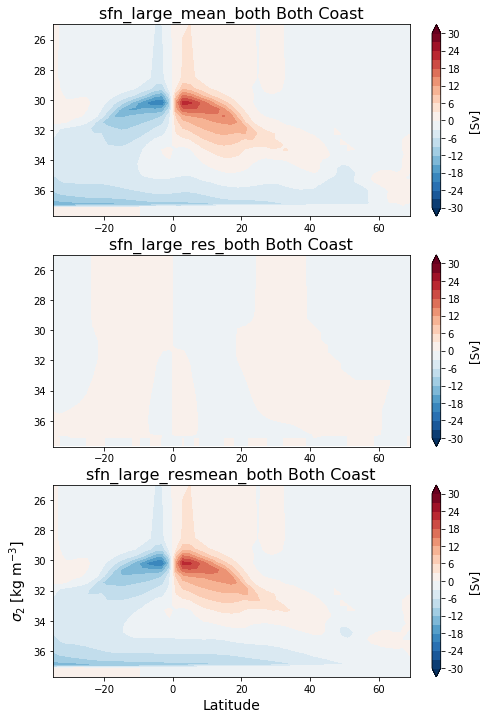

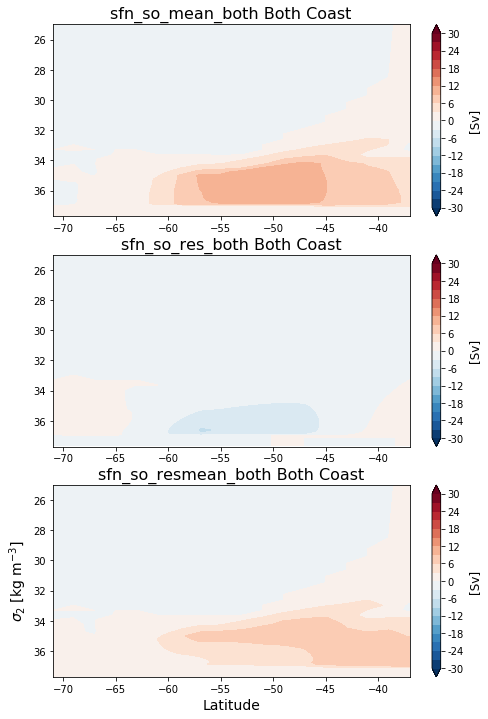

In [9]:
# Both Coast
# Plot global mean, residual, and residual mean overturning streamfunction
plot_global_sfn(sfn_mean_both, sfn_res_both, sfn_resmean_both, 30, drho_both, 'Both Coast')

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines plot streamfunctions for separate basins.
plot_basin_sfn(sfn_small_mean_both, sfn_small_res_both, sfn_small_resmean_both, 
               30, drho_both, y, y_north, 'Both Coast')
plot_basin_sfn(sfn_large_mean_both, sfn_large_res_both, sfn_large_resmean_both, 
               30, drho_both, y, y_north, 'Both Coast')
plot_basin_sfn(sfn_so_mean_both, sfn_so_res_both, sfn_so_resmean_both, 
               30, drho_both, y_south, y, 'Both Coast')

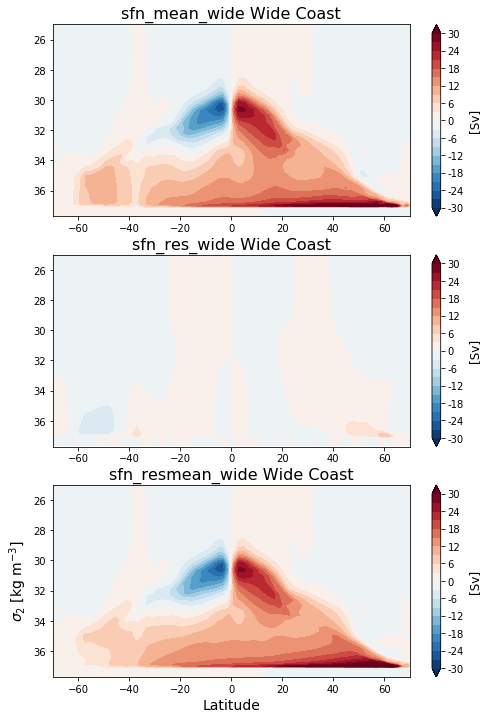

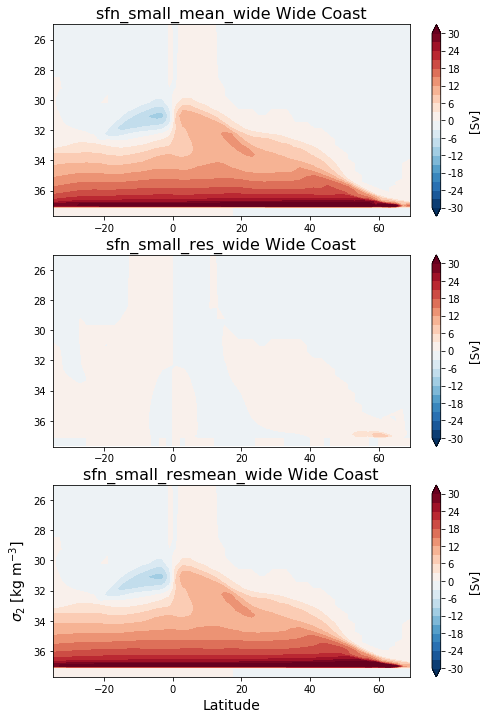

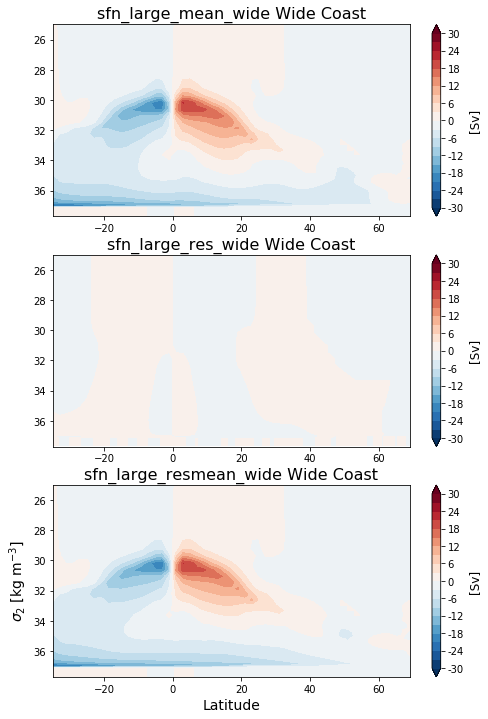

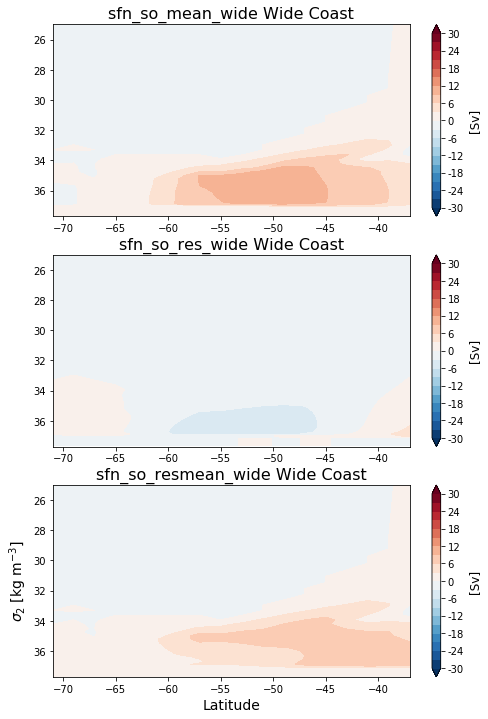

In [10]:
# Wide Coast
# Plot global mean, residual, and residual mean overturning streamfunction
plot_global_sfn(sfn_mean_wide, sfn_res_wide, sfn_resmean_wide, 30, drho_wide, 'Wide Coast')

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines plot streamfunctions for separate basins.
plot_basin_sfn(sfn_small_mean_wide, sfn_small_res_wide, sfn_small_resmean_wide, 
               30, drho_wide, y, y_north, 'Wide Coast')
plot_basin_sfn(sfn_large_mean_wide, sfn_large_res_wide, sfn_large_resmean_wide, 
               30, drho_wide, y, y_north, 'Wide Coast')
plot_basin_sfn(sfn_so_mean_wide, sfn_so_res_wide, sfn_so_resmean_wide, 
               30, drho_wide, y_south, y, 'Wide Coast')

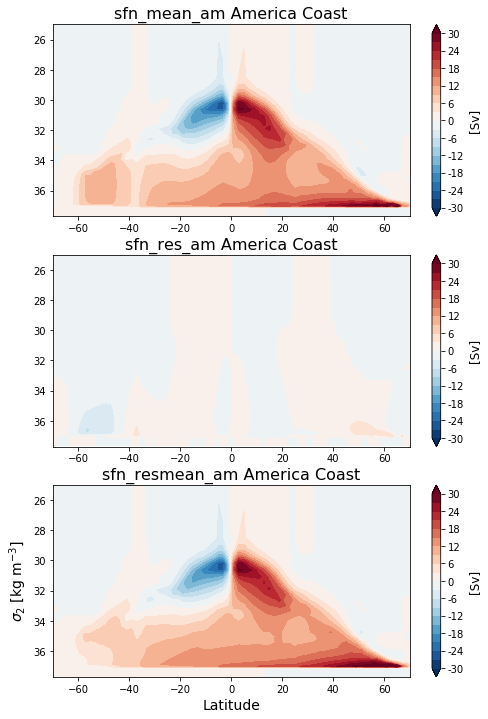

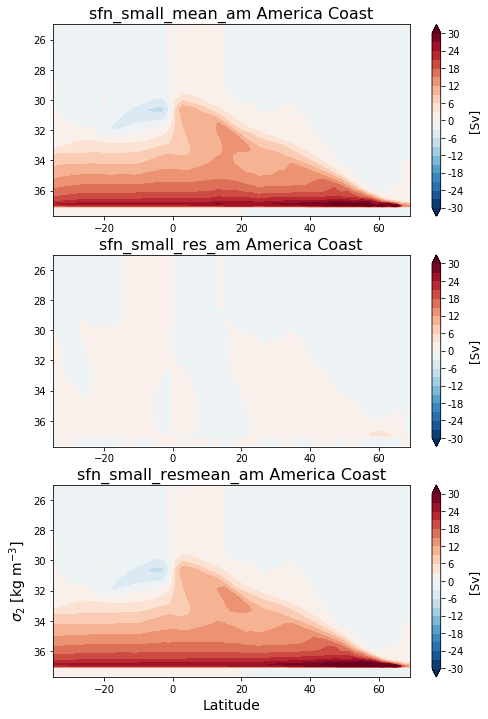

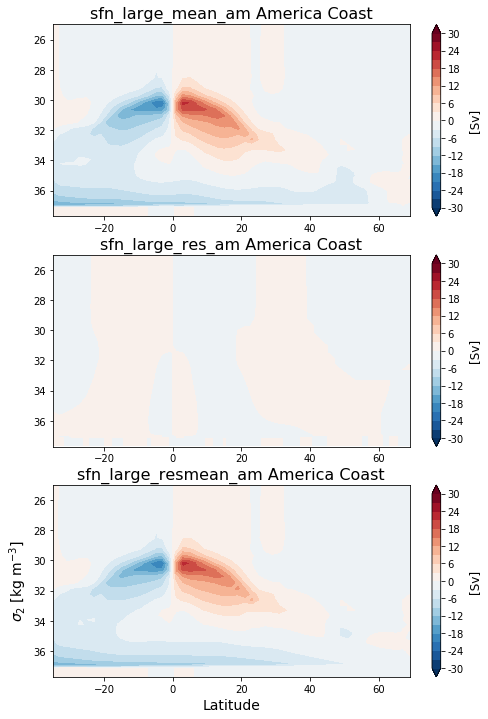

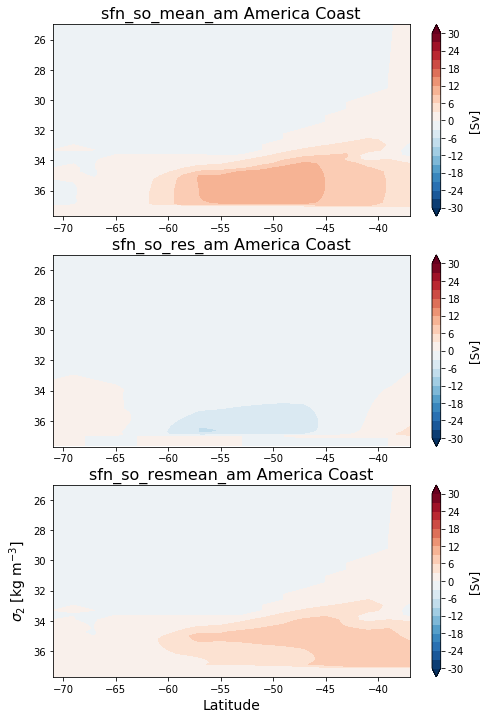

In [11]:
# America Coast
# Plot global mean, residual, and residual mean overturning streamfunction
plot_global_sfn(sfn_mean_am, sfn_res_am, sfn_resmean_am, 30, drho_am, 'America Coast')

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines plot streamfunctions for separate basins.
plot_basin_sfn(sfn_small_mean_am, sfn_small_res_am, sfn_small_resmean_am, 
               30, drho_am, y, y_north, 'America Coast')
plot_basin_sfn(sfn_large_mean_am, sfn_large_res_am, sfn_large_resmean_am, 
               30, drho_am, y, y_north, 'America Coast')
plot_basin_sfn(sfn_so_mean_am, sfn_so_res_am, sfn_so_resmean_am, 
               30, drho_am, y_south, y, 'America Coast')

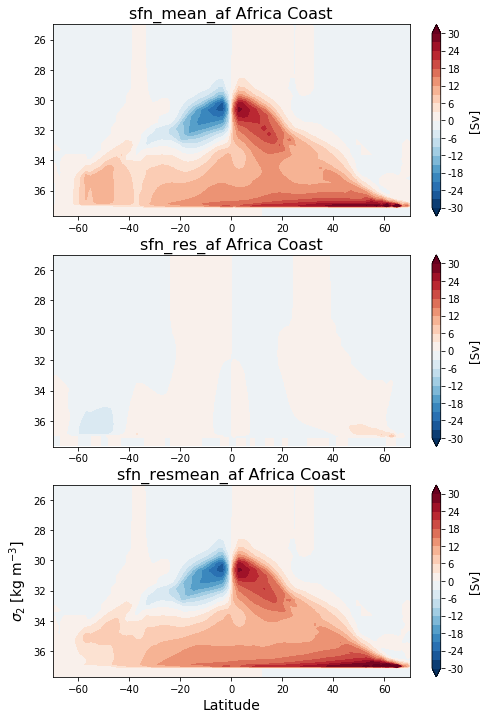

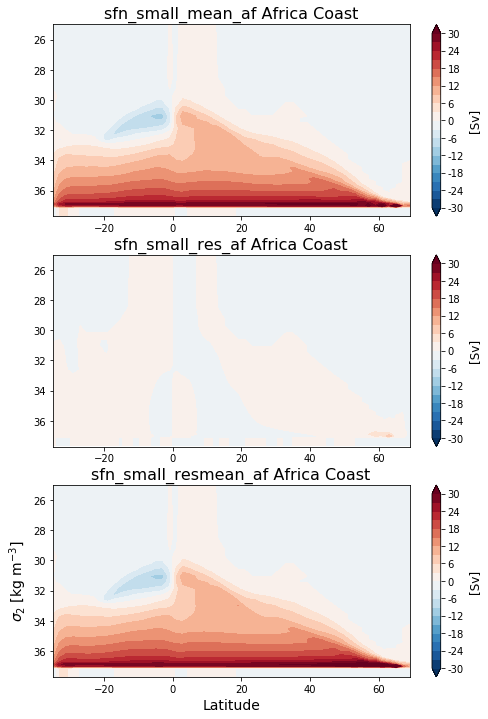

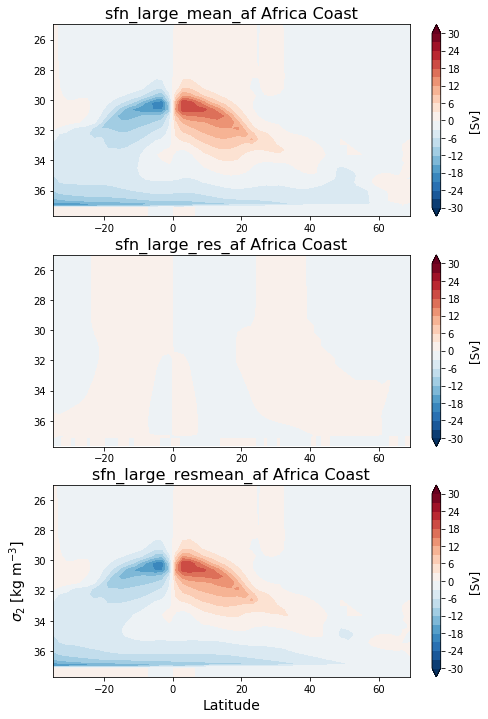

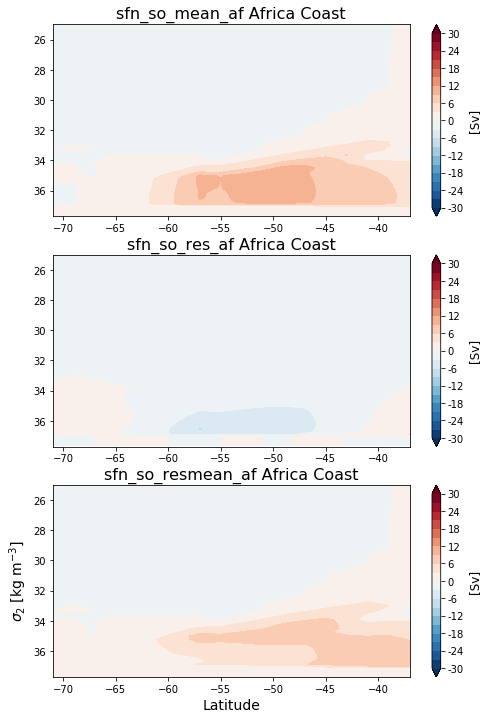

In [12]:
# Africa Coast
# Plot global mean, residual, and residual mean overturning streamfunction
plot_global_sfn(sfn_mean_af, sfn_res_af, sfn_resmean_af, 30, drho_af, 'Africa Coast')

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines plot streamfunctions for separate basins.
plot_basin_sfn(sfn_small_mean_af, sfn_small_res_af, sfn_small_resmean_af, 
               30, drho_af, y, y_north, 'Africa Coast')
plot_basin_sfn(sfn_large_mean_af, sfn_large_res_af, sfn_large_resmean_af, 
               30, drho_af, y, y_north, 'Africa Coast')
plot_basin_sfn(sfn_so_mean_af, sfn_so_res_af, sfn_so_resmean_af, 
               30, drho_af, y_south, y, 'Africa Coast')

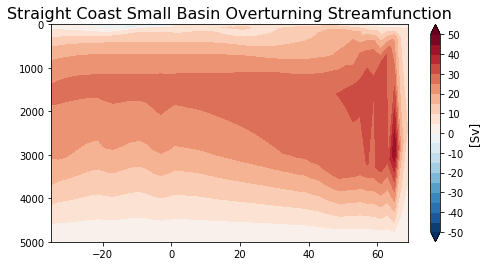

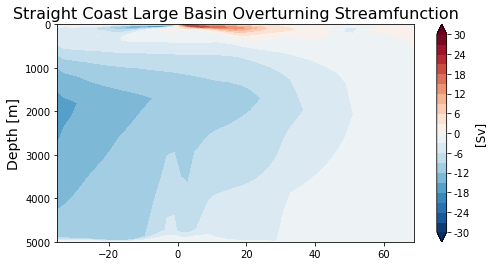

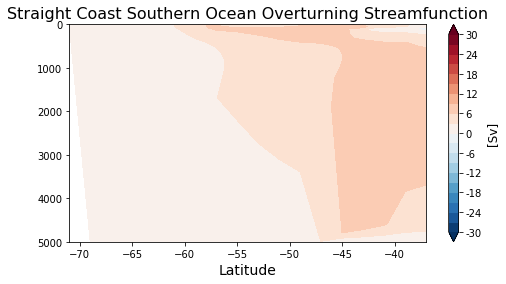

In [13]:
# Straight Coast
# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_straight.yq[y:y_north],(35,1))
lat_south = np.tile(drho_straight.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_resmean_straight, 
                      sfn_large_resmean_straight, 
                      sfn_so_resmean_straight, 
                      50, 
                      drho_straight, 
                      lat_north, 
                      lat_south,
                      'Straight Coast')


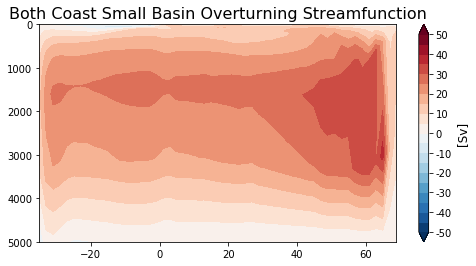

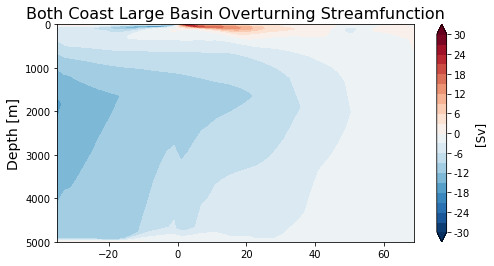

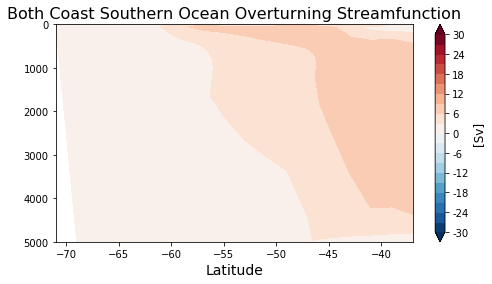

In [14]:
# Both Coast
# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_both.yq[y:y_north],(35,1))
lat_south = np.tile(drho_both.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_resmean_both, 
                      sfn_large_resmean_both, 
                      sfn_so_resmean_both, 
                      50, 
                      drho_both, 
                      lat_north, 
                      lat_south,
                      'Both Coast')

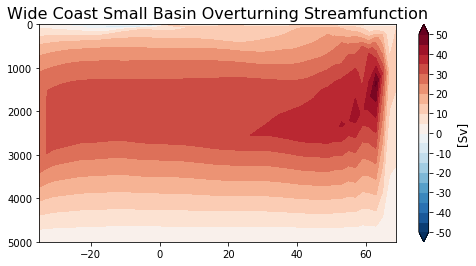

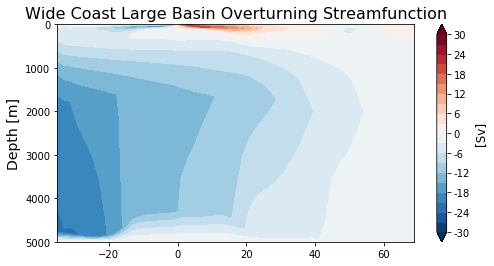

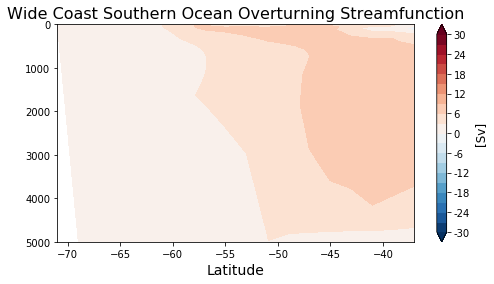

In [15]:
# Wide Coast
# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_wide.yq[y:y_north],(35,1))
lat_south = np.tile(drho_wide.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_resmean_wide, 
                      sfn_large_resmean_wide, 
                      sfn_so_resmean_wide, 
                      50, 
                      drho_wide, 
                      lat_north, 
                      lat_south,
                      'Wide Coast')

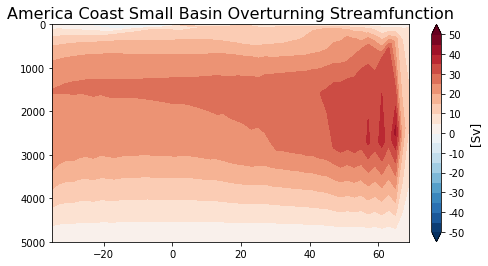

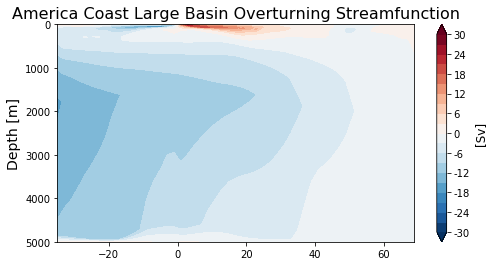

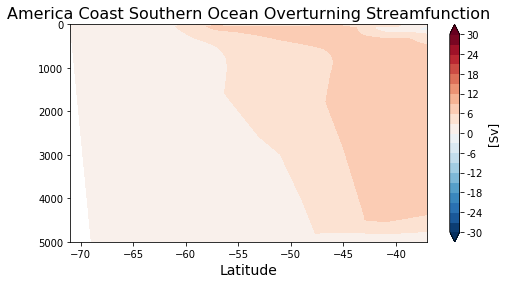

In [16]:
# America Coast
# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_am.yq[y:y_north],(35,1))
lat_south = np.tile(drho_am.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_resmean_am, 
                      sfn_large_resmean_am, 
                      sfn_so_resmean_am, 
                      50, 
                      drho_am, 
                      lat_north, 
                      lat_south,
                      'America Coast')

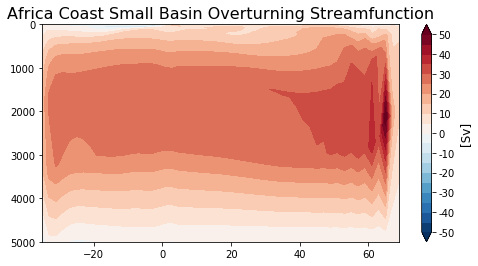

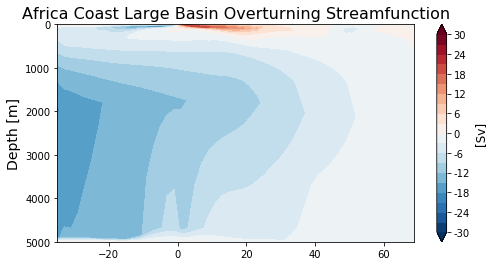

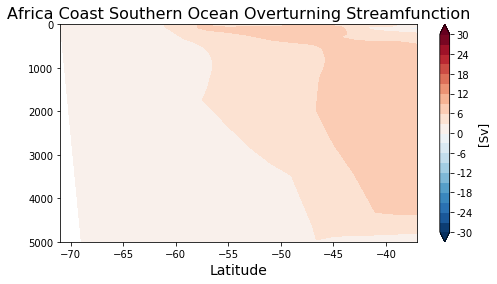

In [17]:
# Africa Coast
# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_af.yq[y:y_north],(35,1))
lat_south = np.tile(drho_af.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_resmean_af, 
                      sfn_large_resmean_af, 
                      sfn_so_resmean_af, 
                      50, 
                      drho_af, 
                      lat_north, 
                      lat_south,
                      'Africa Coast')

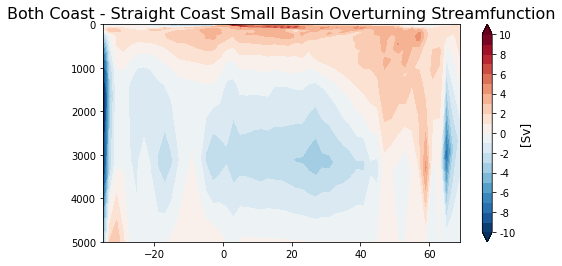

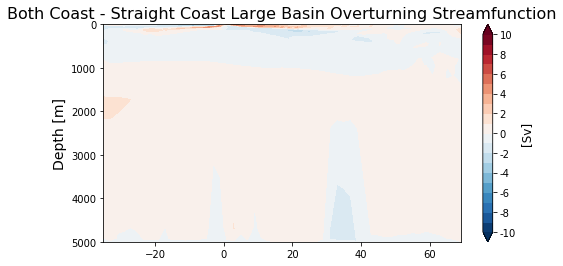

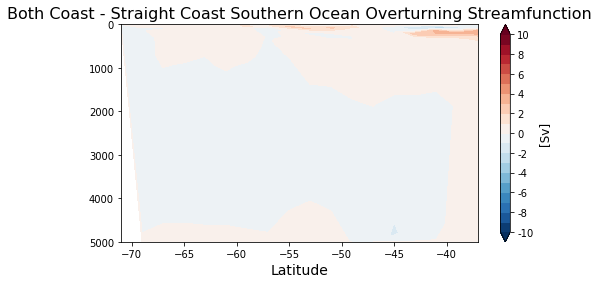

In [41]:
# Both Coast
# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_both.yq[y:y_north],(35,1))
lat_south = np.tile(drho_both.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_resmean_both - sfn_small_resmean_straight, 
                      sfn_large_resmean_both - sfn_large_resmean_straight, 
                      sfn_so_resmean_both - sfn_so_resmean_straight, 
                      10, 
                      drho_both, 
                      lat_north, 
                      lat_south,
                      'Both Coast - Straight Coast')

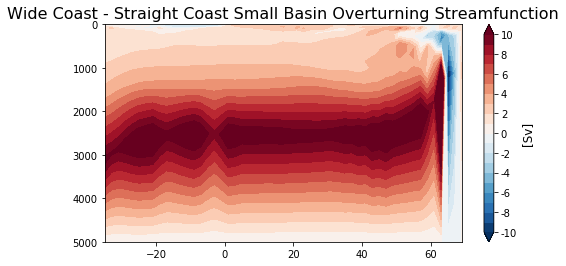

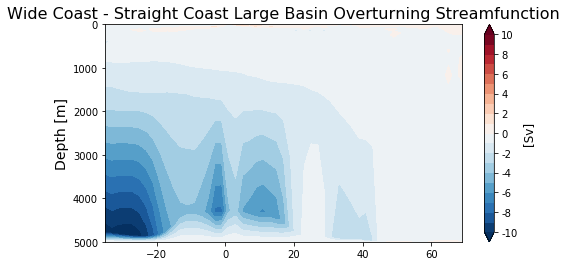

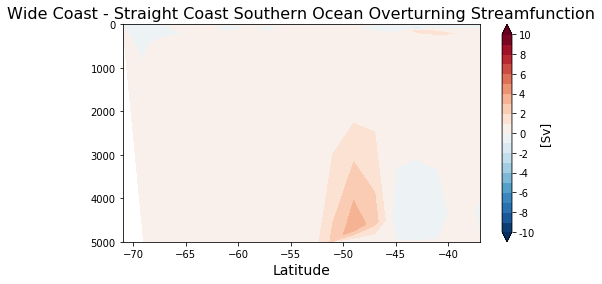

In [43]:
# Wide Coast
# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_wide.yq[y:y_north],(35,1))
lat_south = np.tile(drho_wide.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_resmean_wide - sfn_small_resmean_straight, 
                      sfn_large_resmean_wide - sfn_large_resmean_straight, 
                      sfn_so_resmean_wide - sfn_so_resmean_straight, 
                      10, 
                      drho_wide, 
                      lat_north, 
                      lat_south,
                      'Wide Coast - Straight Coast')

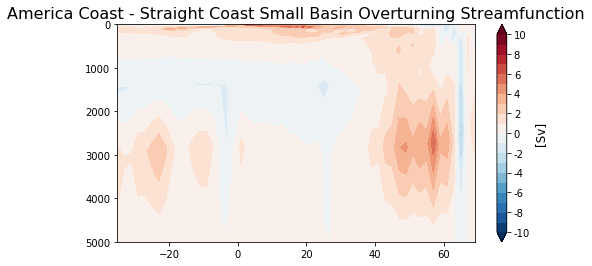

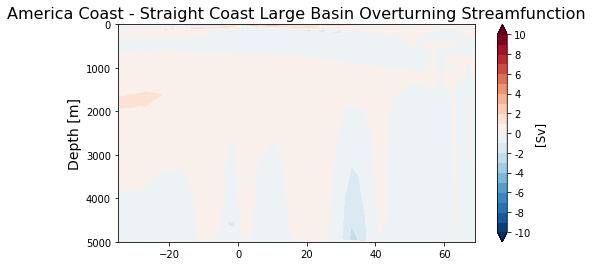

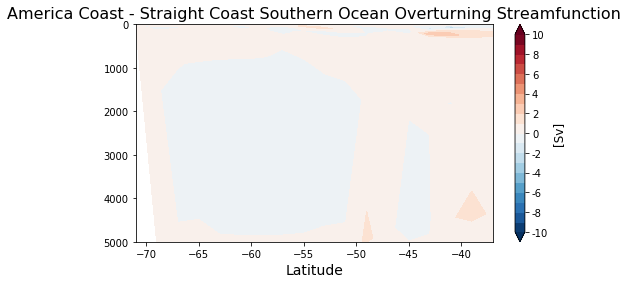

In [48]:
# America Coast
# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_am.yq[y:y_north],(35,1))
lat_south = np.tile(drho_am.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_resmean_am - sfn_small_resmean_straight, 
                      sfn_large_resmean_am - sfn_large_resmean_straight, 
                      sfn_so_resmean_am - sfn_so_resmean_straight, 
                      10, 
                      drho_am, 
                      lat_north, 
                      lat_south,
                      'America Coast - Straight Coast')

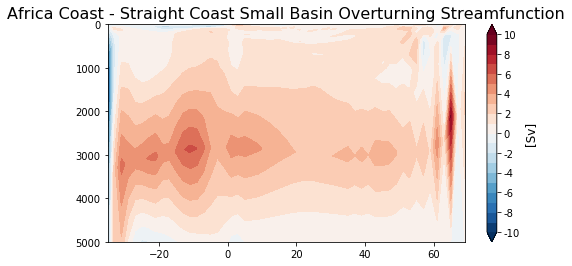

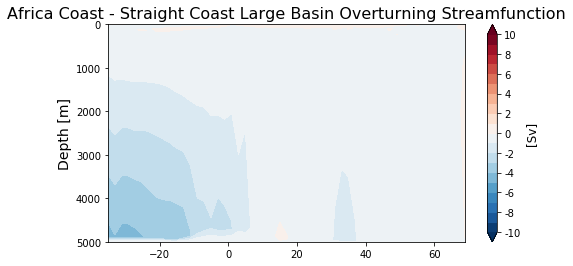

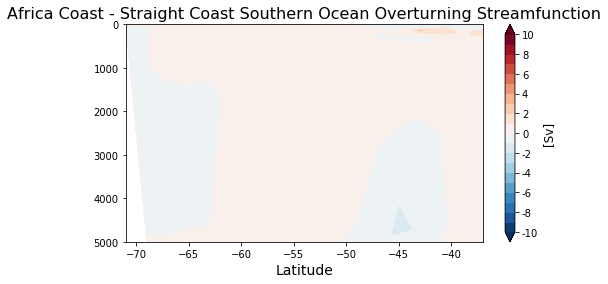

In [47]:
# Africa Coast
# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_af.yq[y:y_north],(35,1))
lat_south = np.tile(drho_af.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_resmean_af - sfn_small_resmean_straight, 
                      sfn_large_resmean_af - sfn_large_resmean_straight, 
                      sfn_so_resmean_af - sfn_so_resmean_straight, 
                      10, 
                      drho_af, 
                      lat_north, 
                      lat_south,
                      'Africa Coast - Straight Coast')

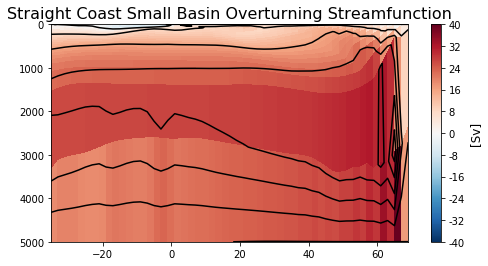

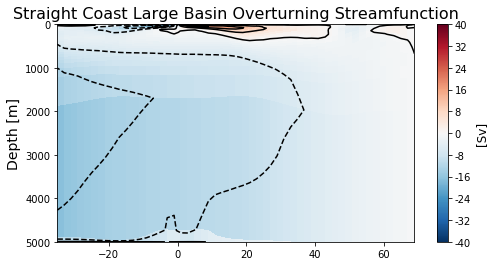

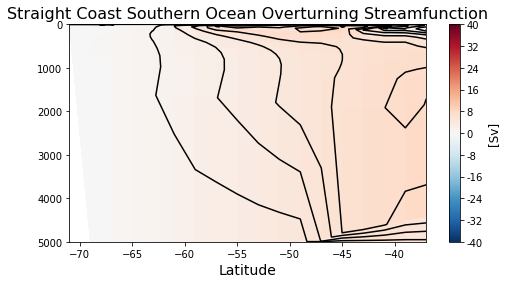

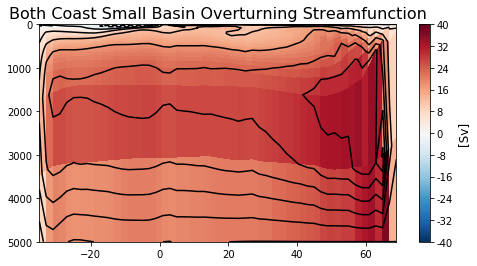

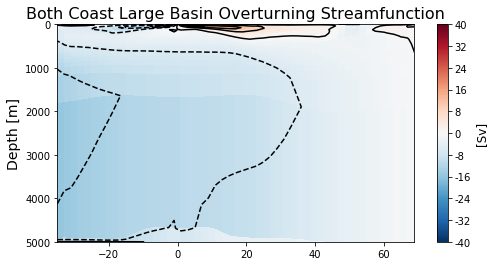

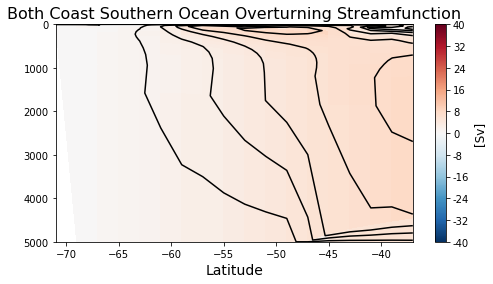

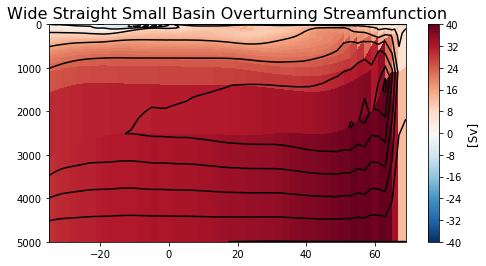

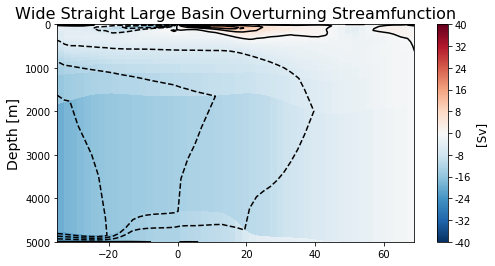

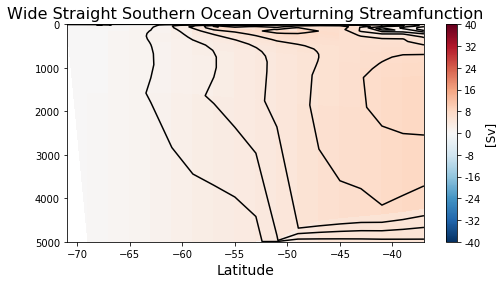

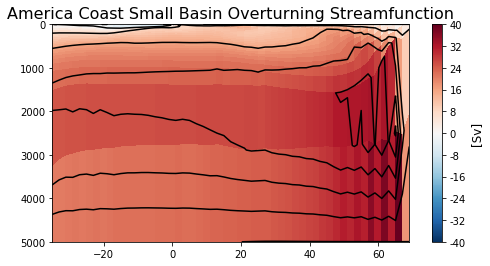

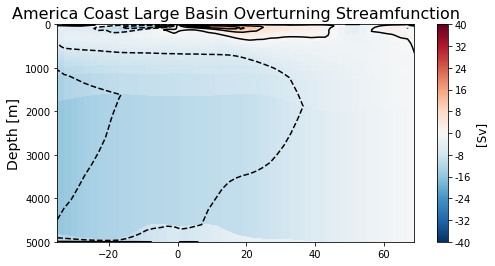

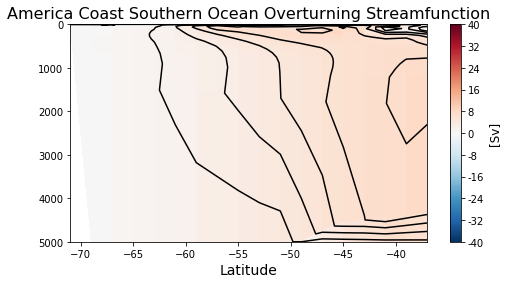

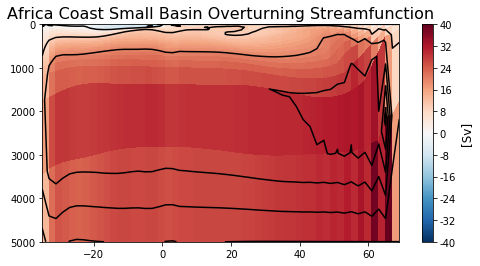

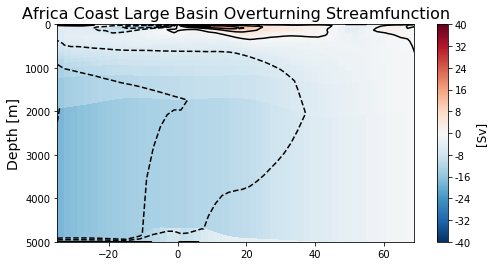

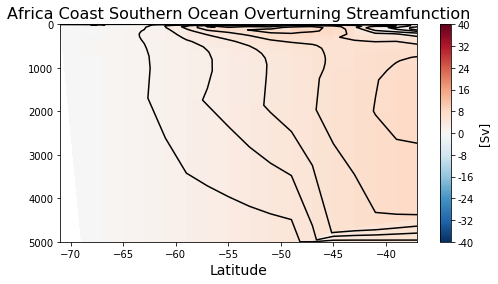

In [22]:
# pcolormesh
# lat_north =  np.tile(drho_straight.yq[y:y_north],(35,1))
# lat_south = np.tile(drho_straight.yq[y_south:y],(35,1))

plot_sfnmapped2depth_mesh(sfn_small_resmean_straight, 
                      sfn_large_resmean_straight, 
                      sfn_so_resmean_straight, 
                      40, 
                      drho_straight, 
                      lat_north, 
                      lat_south,
                      case_straight)

plot_sfnmapped2depth_mesh(sfn_small_resmean_both, 
                      sfn_large_resmean_both, 
                      sfn_so_resmean_both, 
                      40, 
                      drho_both, 
                      lat_north, 
                      lat_south,
                      case_both)

plot_sfnmapped2depth_mesh(sfn_small_resmean_wide, 
                      sfn_large_resmean_wide, 
                      sfn_so_resmean_wide, 
                      40, 
                      drho_wide, 
                      lat_north, 
                      lat_south,
                      case_wide)

plot_sfnmapped2depth_mesh(sfn_small_resmean_am, 
                      sfn_large_resmean_am, 
                      sfn_so_resmean_am, 
                      40, 
                      drho_am, 
                      lat_north, 
                      lat_south,
                      case_am)

plot_sfnmapped2depth_mesh(sfn_small_resmean_af, 
                      sfn_large_resmean_af, 
                      sfn_so_resmean_af, 
                      40, 
                      drho_af, 
                      lat_north, 
                      lat_south,
                      case_af)


In [23]:
# Calculate global mean, residual, and residual mean overturning streamfunction
sfn_mean_straight, sfn_res_straight, sfn_resmean_straight = calculate_global_sfn(dz_straight.vmo, dz_straight.vhGM)

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines compute streamfunctions for separate basins.
sfn_small_mean_straight, sfn_small_res_straight, sfn_small_resmean_straight = calculate_basin_sfn(dz_straight.vmo, 
                                                                                               dz_straight.vhGM, 
                                                                                               x_west, 
                                                                                               x_east, 
                                                                                               y, 
                                                                                               y_north)
sfn_large_mean_straight, sfn_large_res_straight, sfn_large_resmean_straight = calculate_basin_sfn(dz_straight.vmo, 
                                                                                               dz_straight.vhGM, 
                                                                                               0, 
                                                                                               x_west, 
                                                                                               y, 
                                                                                               y_north)
sfn_so_mean_straight, sfn_so_res_straight, sfn_so_resmean_straight = calculate_basin_sfn(dz_straight.vmo, 
                                                                                      dz_straight.vhGM, 
                                                                                      0, 
                                                                                      360, 
                                                                                      y_south, 
                                                                                      y)


In [24]:
# Calculate global mean, residual, and residual mean overturning streamfunction
sfn_mean_both, sfn_res_both, sfn_resmean_both = calculate_global_sfn(dz_both.vmo, dz_both.vhGM)

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines compute streamfunctions for separate basins.
sfn_small_mean_both, sfn_small_res_both, sfn_small_resmean_both = calculate_basin_sfn(dz_both.vmo, 
                                                                                               dz_both.vhGM, 
                                                                                               x_west, 
                                                                                               x_east, 
                                                                                               y, 
                                                                                               y_north)
sfn_large_mean_both, sfn_large_res_both, sfn_large_resmean_both = calculate_basin_sfn(dz_both.vmo, 
                                                                                               dz_both.vhGM, 
                                                                                               0, 
                                                                                               x_west, 
                                                                                               y, 
                                                                                               y_north)
sfn_so_mean_both, sfn_so_res_both, sfn_so_resmean_both = calculate_basin_sfn(dz_both.vmo, 
                                                                                      dz_both.vhGM, 
                                                                                      0, 
                                                                                      360, 
                                                                                      y_south, 
                                                                                      y)


In [25]:
# Calculate sigma2
dz_straight['sigma2'] = calc_sigma2(dz_straight, dy_straight.so.isel(time=slice(-31,-1)).mean(dim='time'), 
                             dy_straight.thetao.isel(time=slice(-31,-1)).mean(dim='time'))

In [26]:
dz_both['sigma2'] = calc_sigma2(dz_both, dy_both.so.isel(time=slice(-31,-1)).mean(dim='time'), 
                             dy_both.thetao.isel(time=slice(-31,-1)).mean(dim='time'))

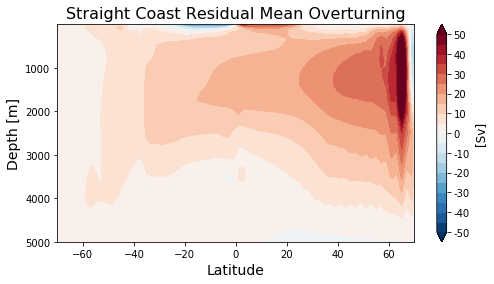

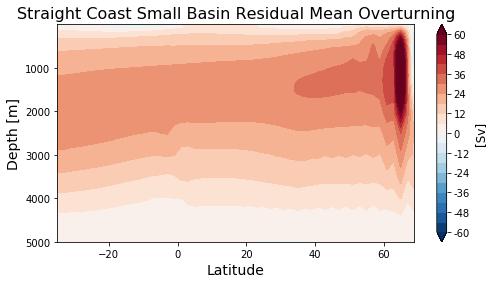

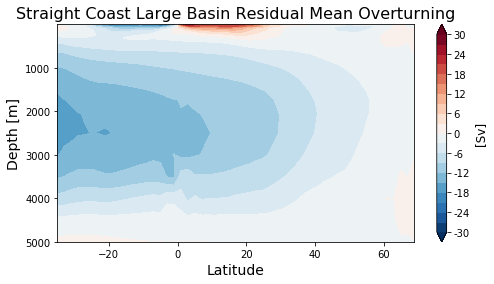

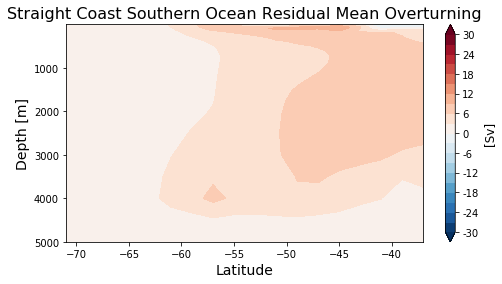

In [27]:
# Plot global mean, residual, and residual mean overturning streamfunction
plot_global_sfn_z(sfn_resmean_straight, 50, dz_straight, 'Straight Coast')

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines plot streamfunctions for separate basins.
plot_basin_sfn_z(sfn_small_resmean_straight, 60, dz_straight, 'Small Basin', 
                 x_west, x_east, y, y_north, 'Straight Coast')
plot_basin_sfn_z(sfn_large_resmean_straight, 30, dz_straight, 'Large Basin', 
                 0, x_west, y, y_north, 'Straight Coast')
plot_basin_sfn_z(sfn_so_resmean_straight, 30, dz_straight, 'Southern Ocean', 
                 0, 360, y_south, y, 'Straight Coast')

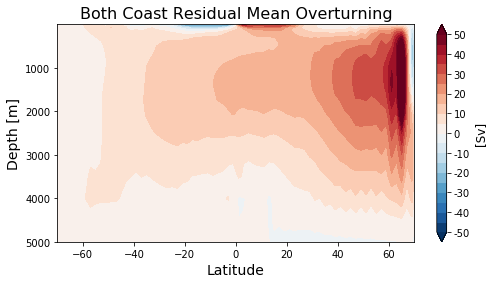

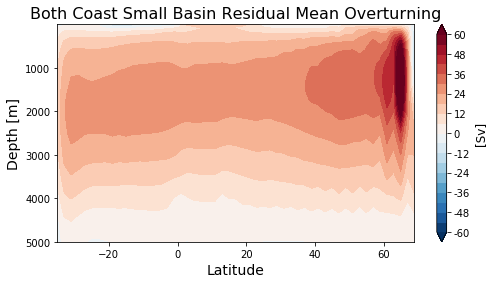

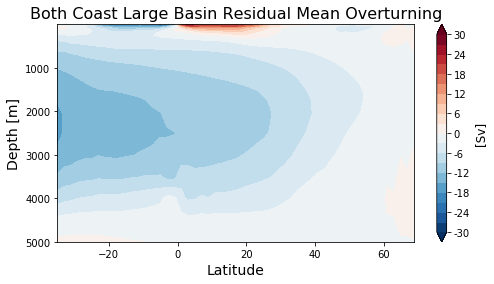

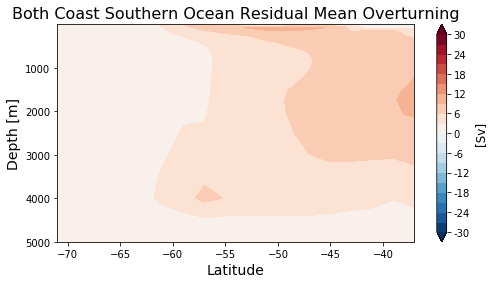

In [28]:
# Plot global mean, residual, and residual mean overturning streamfunction
plot_global_sfn_z(sfn_resmean_both, 50, dz_both, 'Both Coast')

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines plot streamfunctions for separate basins.
plot_basin_sfn_z(sfn_small_resmean_both, 60, dz_both, 'Small Basin', 
                 x_west, x_east, y, y_north, 'Both Coast')
plot_basin_sfn_z(sfn_large_resmean_both, 30, dz_both, 'Large Basin', 
                 0, x_west, y, y_north, 'Both Coast')
plot_basin_sfn_z(sfn_so_resmean_both, 30, dz_both, 'Southern Ocean', 
                 0, 360, y_south, y, 'Both Coast')

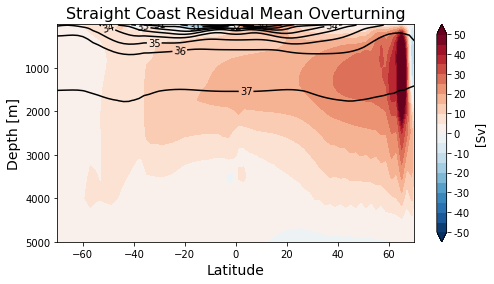

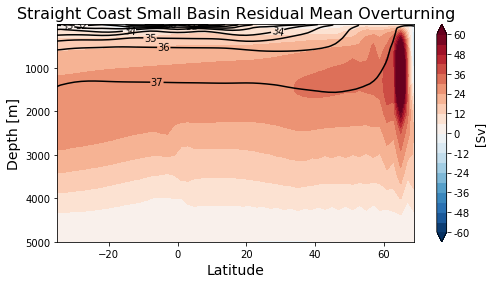

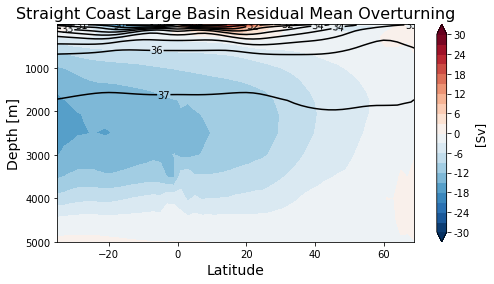

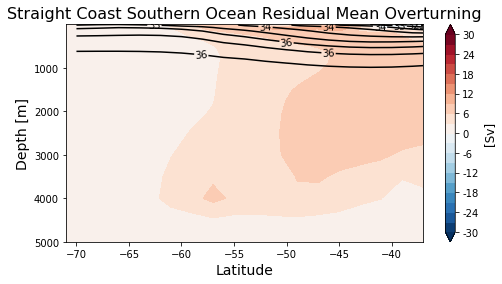

In [29]:
# Straight Coast
# Plot global mean, residual, and residual mean overturning streamfunction
plot_global_sfn_density(sfn_resmean_straight, 50, dz_straight, 'Straight Coast')

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines plot streamfunctions for separate basins.
plot_basin_sfn_density(sfn_small_resmean_straight, 60, dz_straight, 'Small Basin', 
                       x_west, x_east, y, y_north, 'Straight Coast')
plot_basin_sfn_density(sfn_large_resmean_straight, 30, dz_straight, 'Large Basin', 
                       0, x_west, y, y_north, 'Straight Coast')
plot_basin_sfn_density(sfn_so_resmean_straight, 30, dz_straight, 'Southern Ocean', 
                       0, 360, y_south, y, 'Straight Coast')


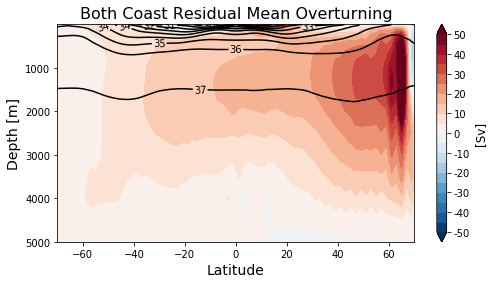

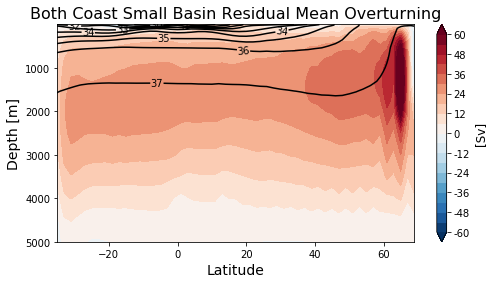

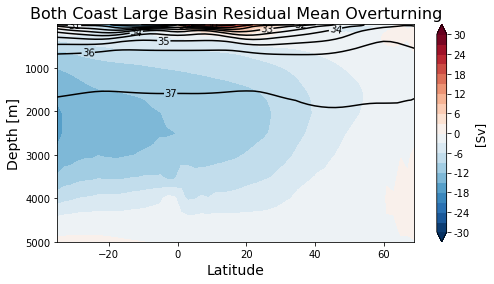

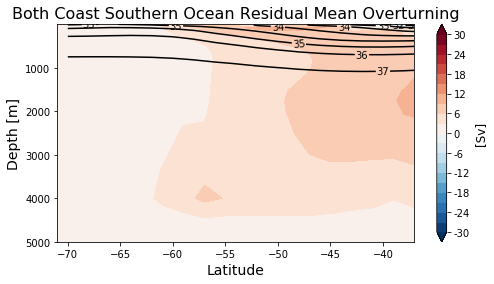

In [30]:
# Both Coast
# Plot global mean, residual, and residual mean overturning streamfunction
plot_global_sfn_density(sfn_resmean_both, 50, dz_both, 'Both Coast')

#===========================================
# Comment out the lines below if running AQUA or RIDGE simulations (or simulations with only 1 basin)
# The following lines plot streamfunctions for separate basins.
plot_basin_sfn_density(sfn_small_resmean_both, 60, dz_both, 'Small Basin', 
                       x_west, x_east, y, y_north, 'Both Coast')
plot_basin_sfn_density(sfn_large_resmean_both, 30, dz_both, 'Large Basin', 
                       0, x_west, y, y_north, 'Both Coast')
plot_basin_sfn_density(sfn_so_resmean_both, 30, dz_both, 'Southern Ocean', 
                       0, 360, y_south, y, 'Both Coast')
